### Imports

In [116]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Text Processing
import re

# Mappping and Geocoding 
import folium
from folium.plugins import HeatMap, MarkerCluster
from geopy.geocoders import Nominatim

# Modeling and Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


### Data Reading

In [51]:
df = pd.read_csv('./data/rio.csv')
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

Dataset contains 28301 rows and 75 columns


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,783493769216852616,https://www.airbnb.com/rooms/783493769216852616,20221229002515,2022-12-29,city scrape,"Leme, Brasil",Apartamento aconchegante próximo à praia do Le...,NaN,https://a0.muscache.com/pictures/fe1f4b1b-a300...,491704706,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
1,703973293620197060,https://www.airbnb.com/rooms/703973293620197060,20221229002515,2022-12-29,city scrape,Suíte com entrada independente em casarão 1,"Casa ampla, em excelente localização, situada ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,20362236,...,5.00,4.00,5.00,NaN,t,4,0,4,0,0.26
2,782895997622988215,https://www.airbnb.com/rooms/782895997622988215,20221229002515,2022-12-29,city scrape,Apartamento próximo ao metrô,Sua família vai estar perto de tudo ao ficar n...,NaN,https://a0.muscache.com/pictures/d48a6798-d1c8...,302417043,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,23768085,https://www.airbnb.com/rooms/23768085,20221229002515,2022-12-29,city scrape,Vamos a praia,"Ótimo apartamento para duas pessoas, de frente...","Localização: praia da Barra da Tijuca, Posto 2...",https://a0.muscache.com/pictures/e43b686c-c4b4...,86611015,...,4.88,4.98,4.78,NaN,t,1,1,0,0,1.59
4,10463735,https://www.airbnb.com/rooms/10463735,20221229002515,2022-12-29,city scrape,Sobrado aconchegante e espaçoso,"Sobrado amplo, arejado, com arquitetura inusit...",Laranjeiras é um bairro histórico do Rio de Ja...,https://a0.muscache.com/pictures/52ffaa78-2e94...,53918534,...,1.00,2.00,1.00,NaN,t,6,2,4,0,0.03


### Viewing The Data

In [52]:
print([col for col in df.columns])

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28301 entries, 0 to 28300
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            28301 non-null  int64  
 1   listing_url                                   28301 non-null  object 
 2   scrape_id                                     28301 non-null  int64  
 3   last_scraped                                  28301 non-null  object 
 4   source                                        28301 non-null  object 
 5   name                                          28272 non-null  object 
 6   description                                   27535 non-null  object 
 7   neighborhood_overview                         14784 non-null  object 
 8   picture_url                                   28301 non-null  object 
 9   host_id                                       28301 non-null 

In [54]:
df.isnull().sum().sort_values()

id                                  0
calendar_last_scraped               0
neighbourhood_cleansed              0
availability_365                    0
latitude                            0
                                ...  
host_about                      14589
calendar_updated                28301
license                         28301
neighbourhood_group_cleansed    28301
bathrooms                       28301
Length: 75, dtype: int64

In [55]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.830100e+04,2.830100e+04,2.830100e+04,28298.000000,28298.000000,0.0,28301.000000,28301.000000,28301.000000,0.0,...,19602.000000,19601.000000,19600.000000,19601.000000,0.0,28301.000000,28301.000000,28301.000000,28301.000000,19783.000000
mean,2.226960e+17,2.022123e+13,1.457719e+08,19.797901,30.847410,NaN,-22.967609,-43.250871,4.114024,NaN,...,4.880358,4.863260,4.869042,4.689421,NaN,9.448677,8.675029,0.680718,0.081517,0.894104
std,3.274209e+17,6.675899e+00,1.530791e+08,105.382449,142.808883,NaN,0.034977,0.099639,2.382022,NaN,...,0.339916,0.366485,0.323033,0.455952,NaN,27.668056,27.675389,1.736604,0.684171,1.026587
min,1.787800e+04,2.022123e+13,3.607000e+03,1.000000,1.000000,NaN,-23.072840,-43.705910,0.000000,NaN,...,0.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.583170e+07,2.022123e+13,1.745770e+07,1.000000,1.000000,NaN,-22.984820,-43.309340,2.000000,NaN,...,4.890000,4.870000,4.870000,4.600000,NaN,1.000000,1.000000,0.000000,0.000000,0.190000
50%,4.432035e+07,2.022123e+13,7.844898e+07,2.000000,3.000000,NaN,-22.972995,-43.196190,4.000000,NaN,...,5.000000,5.000000,5.000000,4.800000,NaN,2.000000,1.000000,0.000000,0.000000,0.540000
75%,6.340560e+17,2.022123e+13,2.447420e+08,5.000000,7.000000,NaN,-22.956210,-43.186255,5.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,4.000000,3.000000,1.000000,0.000000,1.240000
max,7.915838e+17,2.022123e+13,4.930385e+08,1821.000000,1849.000000,NaN,-22.749690,-43.104400,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,228.000000,228.000000,20.000000,13.000000,18.170000


In [56]:
df.room_type.value_counts()

Entire home/apt    22093
Private room        5685
Shared room          470
Hotel room            53
Name: room_type, dtype: int64

In [57]:
df.bathrooms_text.value_counts()

1 bath               12055
2 baths               5713
1 shared bath         2081
1 private bath        1804
3 baths               1543
1.5 baths             1497
2.5 baths             1018
2 shared baths         459
3.5 baths              393
1.5 shared baths       379
4 baths                358
4.5 baths              157
5 baths                130
3 shared baths          82
5.5 baths               79
6 baths                 75
2.5 shared baths        74
7 baths                 47
6.5 baths               45
0 baths                 43
8 baths                 31
4 shared baths          31
0 shared baths          26
7.5 baths               26
Shared half-bath        13
3.5 shared baths        12
5 shared baths          10
6 shared baths           8
11 baths                 8
8.5 baths                8
Half-bath                6
8 shared baths           6
7 shared baths           6
9 baths                  5
10 baths                 4
11.5 baths               4
4.5 shared baths         3
1

In [58]:
print(df['price'])

0        $720.00
1        $599.00
2        $240.00
3        $494.00
4        $581.00
          ...   
28296    $871.00
28297    $194.00
28298    $153.00
28299    $457.00
28300    $200.00
Name: price, Length: 28301, dtype: object


### Data Cleaning

In [59]:
# Creating Utility Functions
def extract_bath(bathroom_text):
    if pd.isnull(bathroom_text):
        return 0
    if 'half-bath' in bathroom_text.lower():
        return 0.5
    match = re.search(r'[\d\.]+', bathroom_text)
    return float(match[0]) if match else 0

def clean_price(price):
    if isinstance(price, str):
        return float(re.sub(r'[$,]', '', price))
    return price


In [60]:
# Cleaning Specific Columns 
def clean_bathroom_data(df):
    df['baths'] = df['bathrooms_text'].apply(extract_bath)
    return df

def clean_price_data(df):
    df['price'] = df['price'].apply(clean_price)
    return df

def categorize_property(df):
    property_type_map = {'entire': 'Entire', 'private': 'Private', 'shared': 'Shared'}
    df['property_category'] = df['property_type'].str.lower().apply(
        lambda x: next((v for k, v in property_type_map.items() if k in x), 'Other')
    )
    return df

# Fill Missing Values with Median
def fill_missing_values(df):
    numeric_cols = ['bedrooms', 'beds', 'review_scores_rating', 'review_scores_value',
                    'reviews_per_month', 'review_scores_location']
    for col in numeric_cols:
        df[col].fillna(df[col].median(), inplace=True)
    return df

# Dropping Columns 
def drop_unnecessary_columns(df):
    drop_cols = ['scrape_id', 'last_scraped', 'source', 'neighborhood_overview', 'host_name',
                 'host_id', 'host_url', 'host_since', 'host_location', 'host_about',
                 'calendar_updated', 'calendar_last_scraped', 'license',
                 'bathrooms', 'bathrooms_text', 'neighbourhood_group_cleansed']
    df.drop(columns=drop_cols, inplace=True)
    return df

# Converting Object Columns to Numeric Values
def convert_to_numeric(df):
    df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)
    return df


In [61]:
# Master Function to Organize Cleaning Operations
def clean_data(df):
    df = clean_bathroom_data(df)
    df = clean_price_data(df)
    df = categorize_property(df)
    df = fill_missing_values(df)
    df = drop_unnecessary_columns(df)
    df = convert_to_numeric(df)
    return df


In [62]:
df = clean_data(df)
print(df)

                       id                                      listing_url  \
0      783493769216852616  https://www.airbnb.com/rooms/783493769216852616   
1      703973293620197060  https://www.airbnb.com/rooms/703973293620197060   
2      782895997622988215  https://www.airbnb.com/rooms/782895997622988215   
3                23768085            https://www.airbnb.com/rooms/23768085   
4                10463735            https://www.airbnb.com/rooms/10463735   
...                   ...                                              ...   
28296  689013693819928481  https://www.airbnb.com/rooms/689013693819928481   
28297            23414904            https://www.airbnb.com/rooms/23414904   
28298            48489080            https://www.airbnb.com/rooms/48489080   
28299            43109156            https://www.airbnb.com/rooms/43109156   
28300             2827790             https://www.airbnb.com/rooms/2827790   

                                                   name  \
0   

In [63]:
df['price']

0        720.0
1        599.0
2        240.0
3        494.0
4        581.0
         ...  
28296    871.0
28297    194.0
28298    153.0
28299    457.0
28300    200.0
Name: price, Length: 28301, dtype: float64

### EDA & Data Visualizations

In [64]:
sns.set_style("whitegrid")

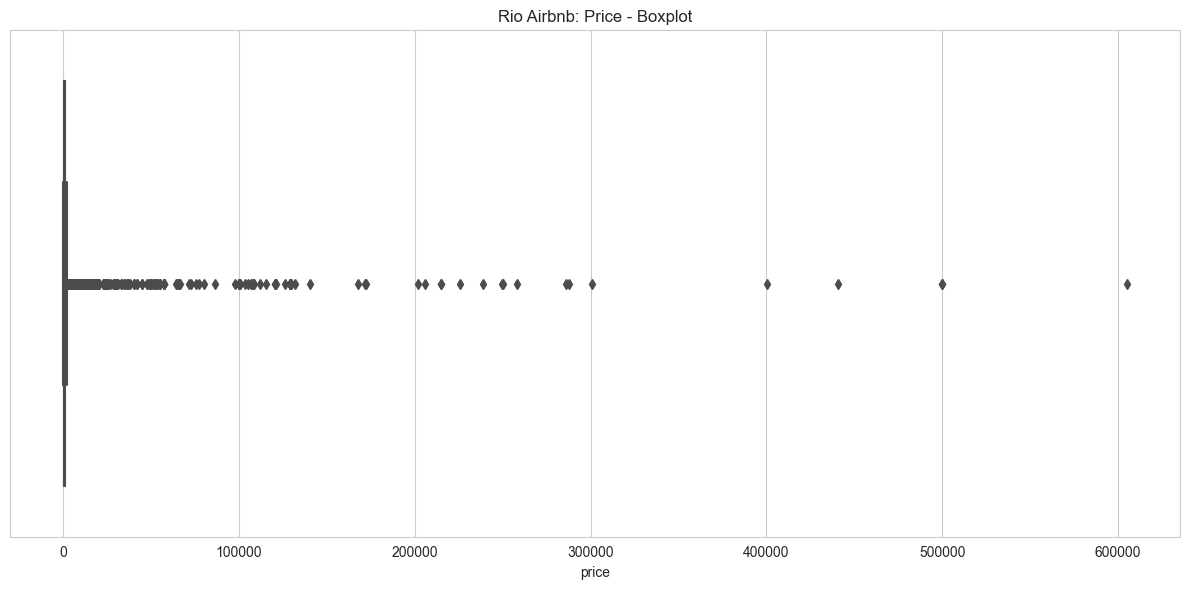

In [77]:
# Boxplot of Prices
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'], color='red')
plt.title('Rio Airbnb: Price - Boxplot')
plt.tight_layout()
plt.savefig('./visualizations/price_boxplot.jpg')
plt.show()


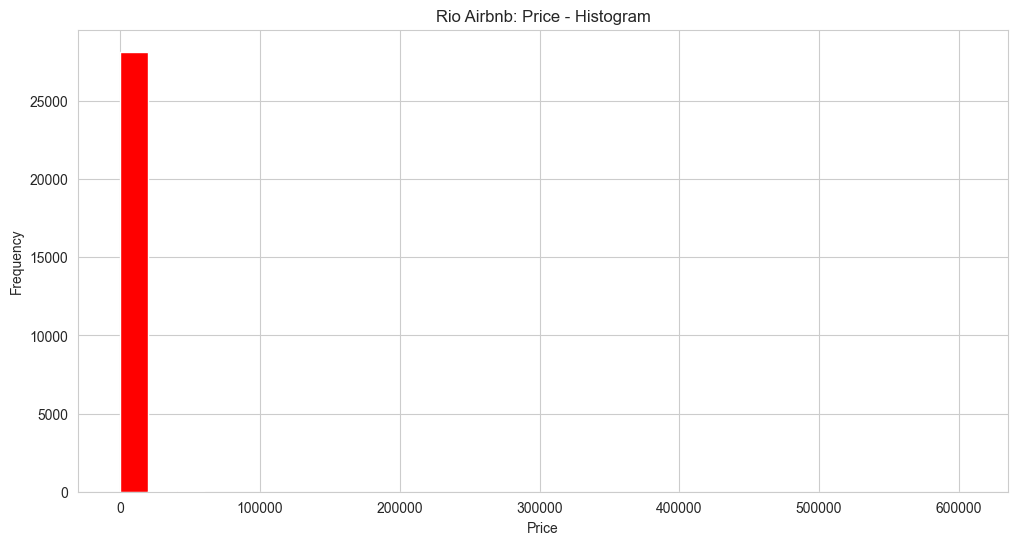

In [79]:
# Histogram of Prices
plt.figure(figsize=(12, 6))
df['price'].hist(bins=30, color='red')
plt.title('Rio Airbnb: Price - Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

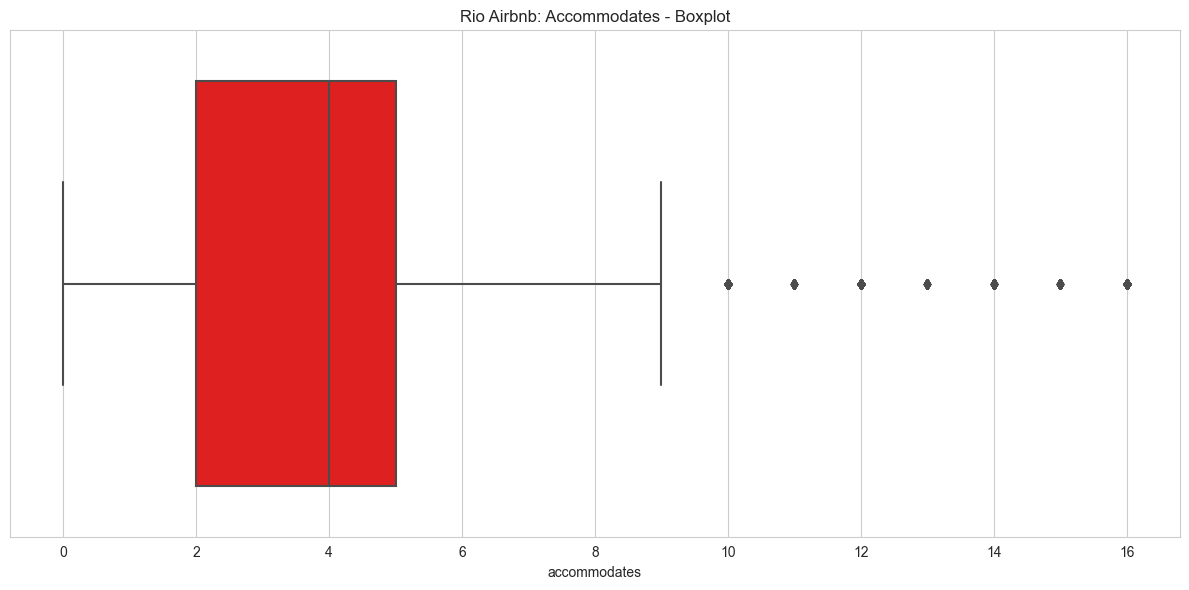

In [80]:
# Boxplot of Accommodates
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['accommodates'], color='red')
plt.title('Rio Airbnb: Accommodates - Boxplot')
plt.tight_layout()
plt.savefig('./visualizations/accommodates_boxplot.jpg')
plt.show()

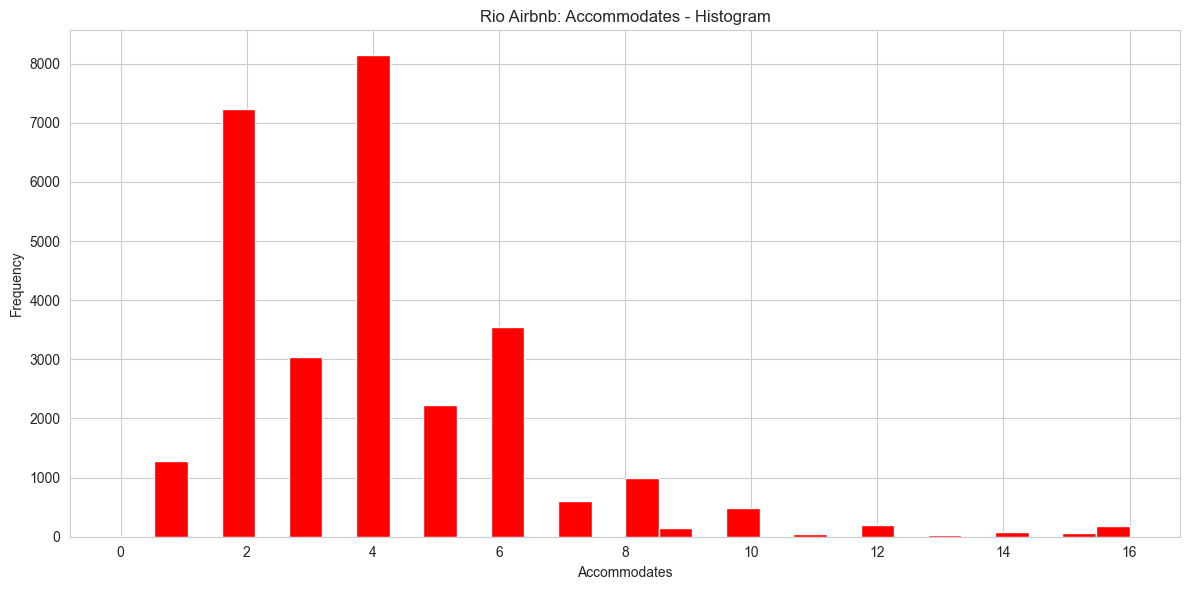

In [81]:
# Histogram of Accommodates
plt.figure(figsize=(12, 6))
df['accommodates'].hist(bins=30, color='red')
plt.title('Rio Airbnb: Accommodates - Histogram')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('./visualizations/accommodates_histogram.jpg')
plt.show()

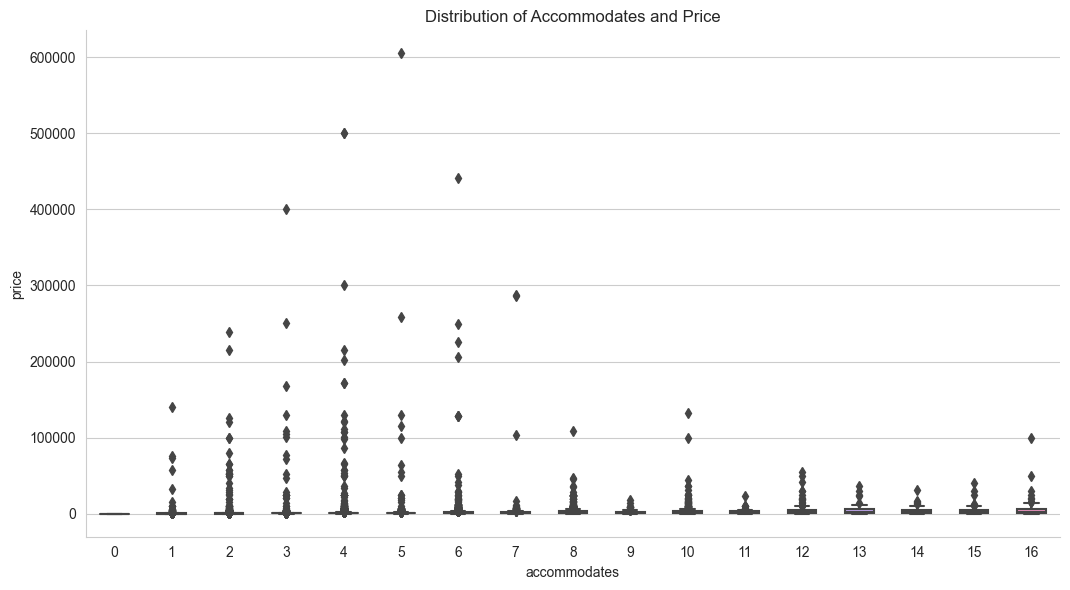

In [82]:
# Scatter plot of Accommodates vs Price
sns.catplot(x='accommodates', y='price', kind='box', data=df, height=6, aspect=1.8, width=0.5)
plt.title('Distribution of Accommodates and Price')
plt.tight_layout()
plt.savefig('./visualizations/accommoand_price.jpg')

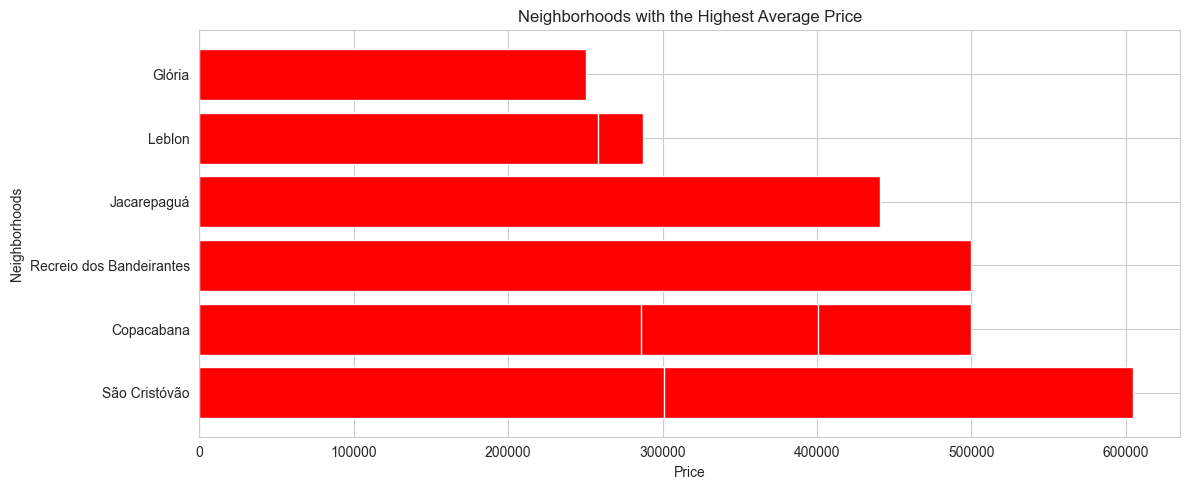

In [83]:
# Average Price by Neighbourhood
price_by_neighbourhood = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

# Bar Chart for Top 10 Highest Priced Neighbourhoods
top_10 = df.nlargest(10, 'price')
plt.figure(figsize=(12, 5))
plt.barh(top_10['neighbourhood_cleansed'], top_10['price'], color='red')
plt.title('Neighborhoods with the Highest Average Price')
plt.xlabel('Price')
plt.ylabel('Neighborhoods')
plt.tight_layout()
plt.savefig('./visualizations/highest_list_price.jpg')
plt.show()

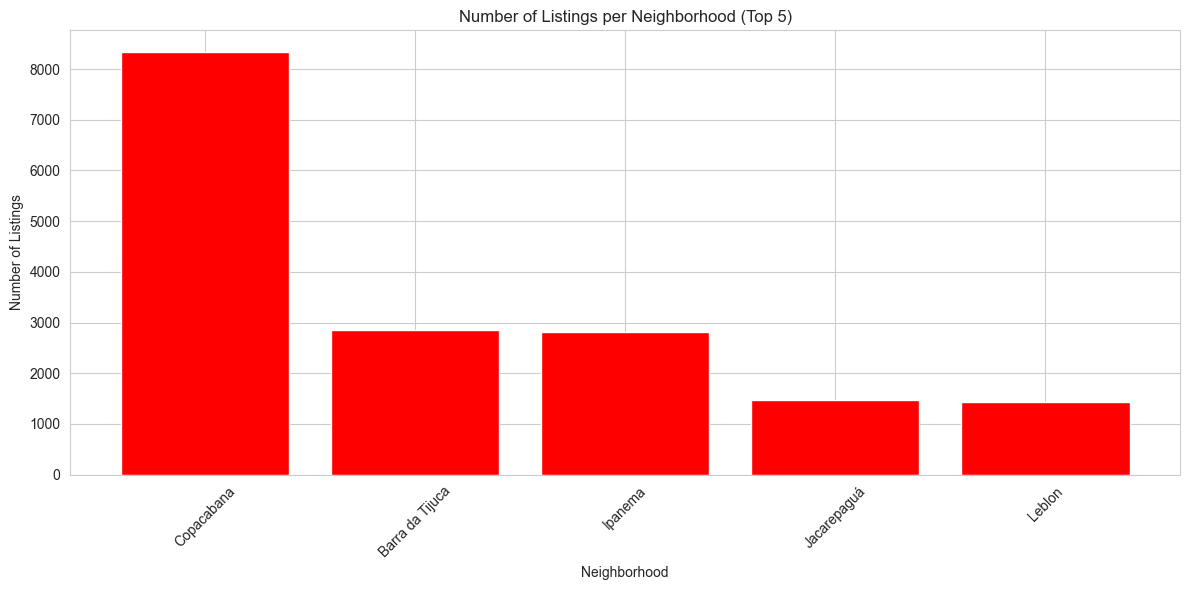

In [85]:
# Number of Listings by Neighborhood
listings_by_neighbourhood = df.groupby('neighbourhood_cleansed').size().sort_values(ascending=False)

# Bar Chart for Number of Listings per Neighborhood (Top 5)
top_5_listings_by_neighbourhood = listings_by_neighbourhood.head(5)
plt.figure(figsize=(12, 6))
plt.bar(top_5_listings_by_neighbourhood.index, top_5_listings_by_neighbourhood.values, color='red')
plt.title('Number of Listings per Neighborhood (Top 5)')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./visualizations/listings_per_neighborhood.jpg')
plt.show()

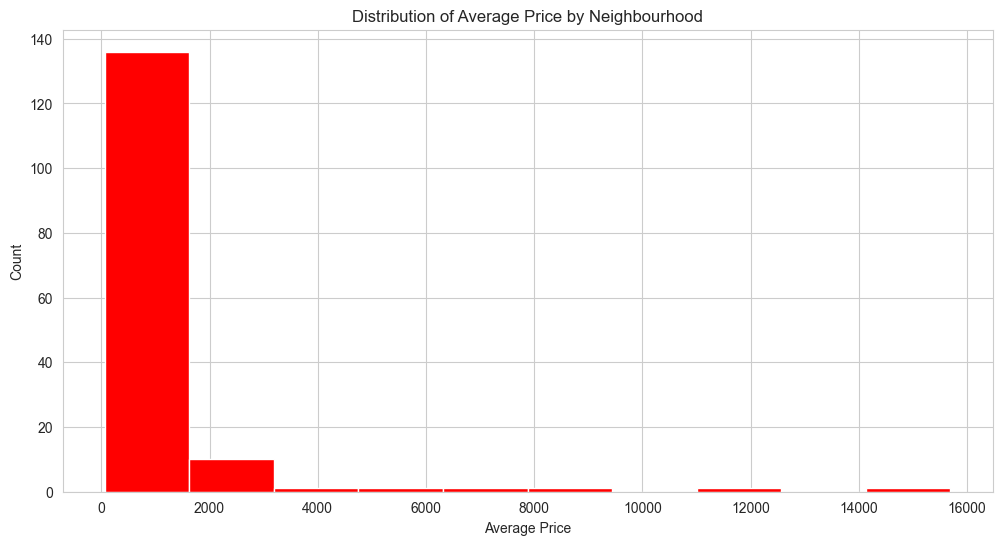

In [87]:
# Average Price by Neighbourhood (Histogram)
plt.figure(figsize=(12, 6))
plt.hist(price_by_neighbourhood, bins=10, color='red')
plt.title('Distribution of Average Price by Neighbourhood')
plt.xlabel('Average Price')
plt.ylabel('Count')
plt.savefig('./visualizations/avg_price_by_neighborhood.jpg')
plt.show()


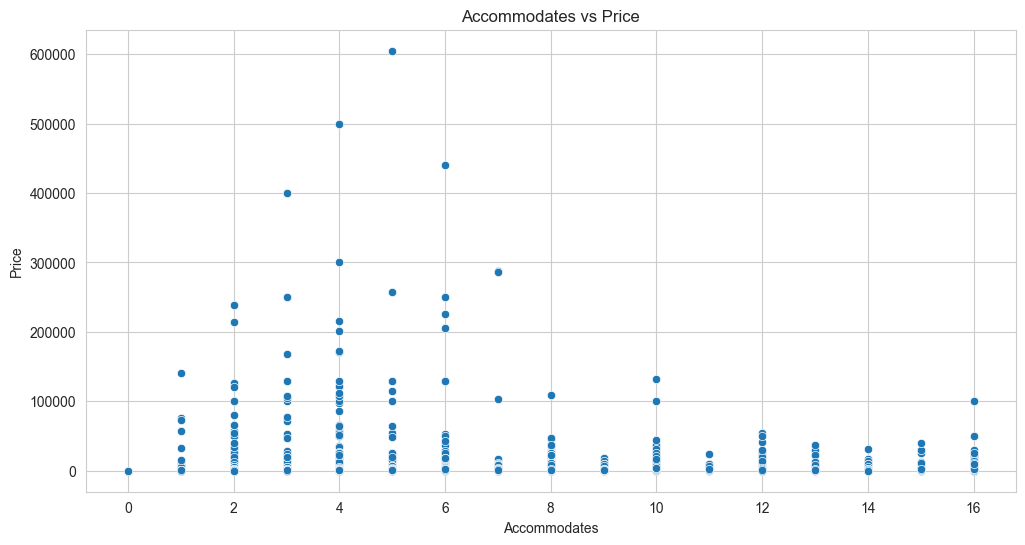

In [88]:
# Accommodates vs Price Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='accommodates', y='price', data=df)
plt.title('Accommodates vs Price')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.savefig('./visualizations/accommodates_vs_price.jpg')
plt.show()

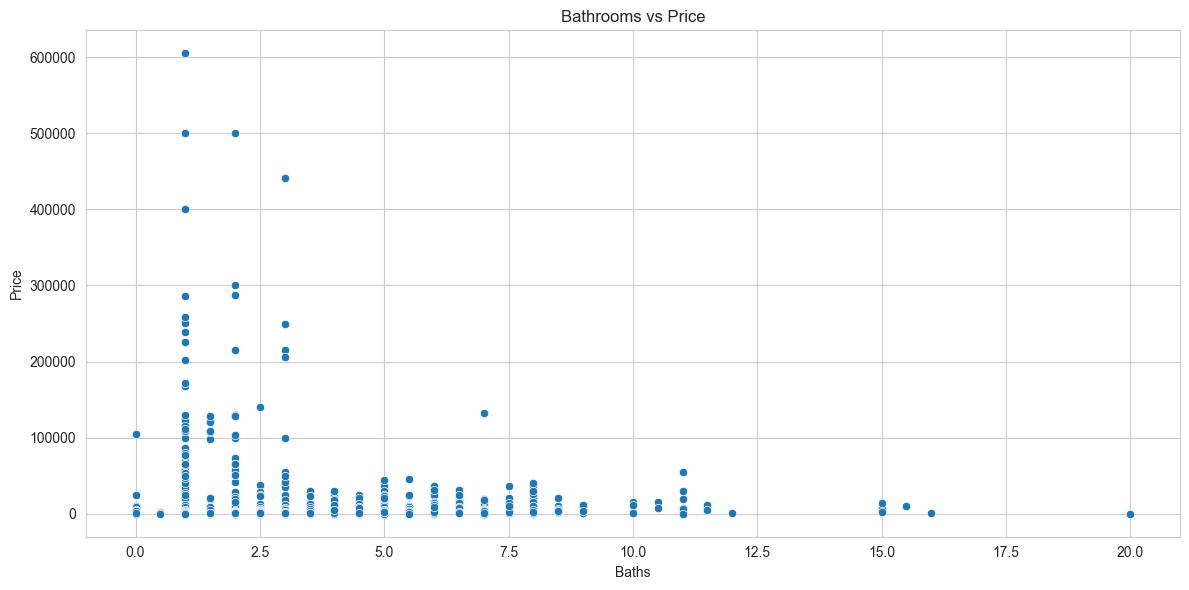

In [89]:
# Bathrooms vs Price Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='baths', y='price', data=df)
plt.title('Bathrooms vs Price')
plt.xlabel('Baths')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig('./visualizations/baths_vs_price.jpg')
plt.show()


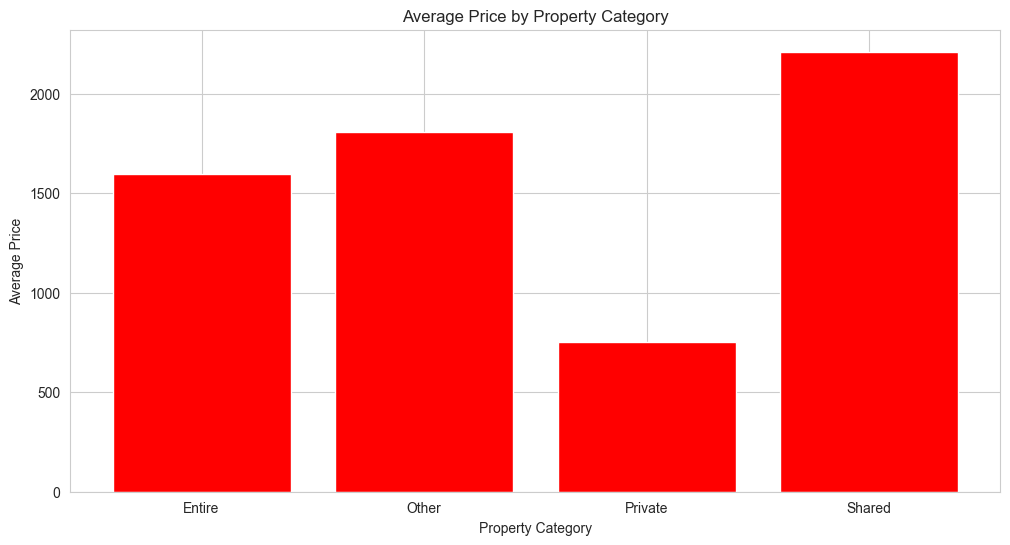

In [91]:
# Average Price by Property Category
avg_price_by_category = df.groupby('property_category')['price'].mean()
plt.figure(figsize=(12, 6))
plt.bar(avg_price_by_category.index, avg_price_by_category.values, color='red')
plt.title('Average Price by Property Category')
plt.xlabel('Property Category')
plt.ylabel('Average Price')
plt.savefig('./visualizations/avg_price_by_category.jpg')
plt.show()

In [94]:
# Creating a map with MarkerClusters
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=11)
marker_cluster = MarkerCluster().add_to(m)
listings_by_neighbourhood = df.groupby('neighbourhood_cleansed').agg({'id': 'count', 'latitude': 'mean', 'longitude': 'mean'}).reset_index()
for _, row in listings_by_neighbourhood.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=f"{row['neighbourhood_cleansed']} Listings: {row['id']}").add_to(marker_cluster)
m.save('./visualizations/map_with_clusters.html')

In [95]:
# Create and display a Folium map with price data
price_map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)
for index, row in df.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=5,
                        weight=1,
                        color='blue',
                        fill_color='blue',
                        fill_opacity=0.6,
                        popup=f"Price: ${row['price']}").add_to(price_map)
price_map.save('./visualizations/price_map.html')

/var/folders/ls/rb0w9bbn24x0kssdjbf1scxh0000gn/T/ipykernel_66893/253795347.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['price'].sort_values(ascending=False)[:6]  # Get top 5 plus price itself


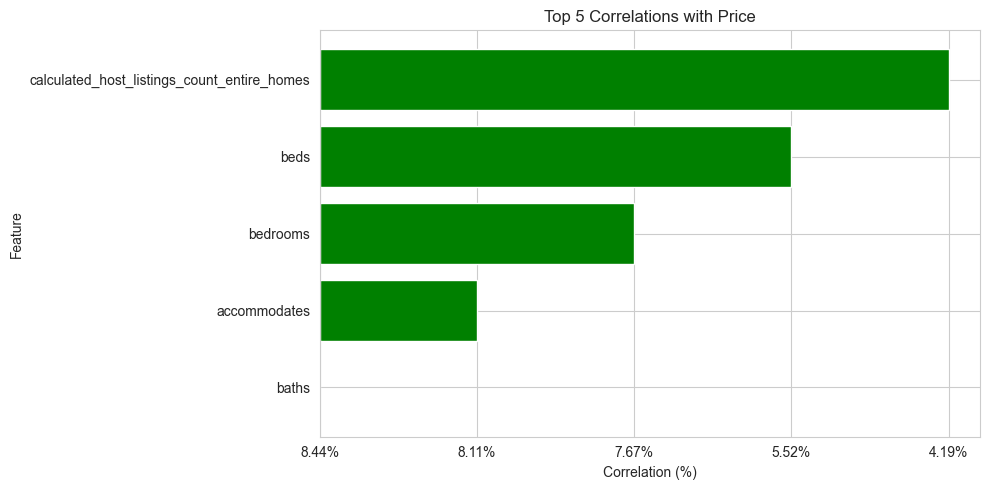

In [110]:
# Calculate the correlation of each column with the 'price' column and sort in descending order
corr = df.corr()['price'].sort_values(ascending=False)[:6]  # Get top 5 plus price itself
corr = corr[1:]  # Remove 'price' correlation with itself

# Format the correlation values for better readability
corr = corr.apply(lambda x: f'{x*100:.2f}%')

# Create a horizontal bar chart for the top 5 correlations
plt.figure(figsize=(10, 5))
plt.barh(corr.index, corr.values, color='g')
plt.title('Top 5 Correlations with Price')
plt.xlabel('Correlation (%)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('./visualizations/price_correlation.jpg')
plt.show()

In [118]:
df.to_csv('./data/cleaned_data.csv', index=False)
